## Analysis of the effects of the 2017 Travel Ban Executive order
We were curious what some of the effects of the 2017 Travel Ban executive order signed by President Donald Trump on individuals and wanted to answer a few specific questions.
    
    1. Looking at the 7 countries targeted by the ban, how many people would be refused greencards over a 90 day period? What proportion would be refugees?
    -howandwheregreencard.xls
    Assume refugee applicants for 2017 are roughly the same as 2015 and the applicants are distributed iid Uniformly over the year.
    
    2. With Refugees, where do they come from? What country brings the highest proportion of refugees vs Green Card holders? Do these countries have more refugees than others on average?
    -HowAndWhereGreenCard.xls
    Plot on map showing number of immigrants and proportion of immigrants that are refugees.
    
    3. How many of these individuals would be deported? How many for doing illegal things?
    -RemovedByCrimAndNationality.xls
    
    4.Analysis public sentiment for the ban.
    Twitter API for public sentiment.
We asked these to see more into what this ban would do to the United States as a whole using data from 2015 from the US Department of Homeland Security. This data will be analyzed through pandas and visualized in different ways.

## Packages Used

First the packages we are going to be using will include pandas and numpy for organizing our data, matplotlib in order to graph things and using the gg plot style. The ttest_ind will be used for our t test later on in the analysis which is important to look at. The "Austin" package was created by Austin in order to save our tables to an sqllite file and is also used in the scraping of Twitter later on to form our overarching dataset for our analysis later on. Basemap, Polygon, Normalize, and PatchCollection is used in the formation of our maps later on for visualization.

In [1]:
import pandas as pd
import numpy as np
import Austin
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.cm 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize\

## Working with the DHS data
First we need to take the DHS data and put it into a dataframe. In the excel doc, values with a D are nondisclosed values for secrecy, so we made those into NAs and also made it so there are Trues and Falses for if the country is considered banned or not in the collumn 'banned'. There is also a column called 'refugee_to_total' which will have the proportion of green card holders that are refugees. All relevant collumns are turned into np.float values in order to be used on each other. Country of birth is changed to country for the mapping later on.

In [3]:
greencard = pd.read_excel('HowAndWhereGreenCard.xls',sheetname='Country',
              skiprows=[0,1,2], skip_footer=4,na_values = ['D'])
greencard['refugee_to_total']=''
greencard['banned']=''
greencard['Total'] = greencard['Total'].astype(np.float64)
bannedcount = ['Iran','Iraq','Libya','Somalia', 'Sudan','Syria','Yemen']
for x in xrange(len(greencard)):
    if greencard['Country of birth'][x] in bannedcount:
        greencard['banned'][x] = True
    else:
        greencard['banned'][x] = False
for x in xrange(len(greencard)): 
    greencard['refugee_to_total'][x]=greencard['Refugees and asylees'][x]/greencard['Total'][x]
greencard['refugee_to_total']=greencard['refugee_to_total'].astype(np.float)
greencard.rename(columns={'Country of birth':'country'}, inplace=True)

C:\Users\Spencer\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Spencer\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Spencer\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
greencard = greencard[1:]
greencard

,country,Total,Family-sponsored preferences,Employment-based preferences,Immediate relatives of U.S. citizens,Diversity,Refugees and asylees,Other,refugee_to_total,banned
1,Afghanistan,8328.0,272.0,16.0,1011.0,50.0,691.0,6288.0,0.082973,False
2,Albania,4653.0,614.0,81.0,2017.0,1770.0,152.0,19.0,0.032667,False
3,Algeria,1775.0,103.0,40.0,570.0,1035.0,19.0,8.0,0.010704,False
4,Angola,154.0,8.0,12.0,89.0,6.0,39.0,0.0,0.253247,False
5,Anguilla,22.0,NaN,NaN,18.0,0.0,0.0,1.0,0.000000,False
6,Antigua-Barbuda,290.0,97.0,12.0,176.0,NaN,0.0,NaN,0.000000,False
7,Argentina,3730.0,194.0,1095.0,2194.0,48.0,133.0,66.0,0.035657,False
8,Armenia,2962.0,247.0,120.0,1035.0,1324.0,225.0,11.0,0.075962,False
9,Aruba,38.0,4.0,4.0,30.0,0.0,0.0,0.0,0.000000,False
10,Australia,3034.0,68.0,930.0,1636.0,390.0,NaN,NaN,NaN,False


Next, we are going to work on the values for the people who were removed from the country. In this case we have to change both D's and X's into NaNs since some were not disclosed due again to privacy issues.

In [5]:
removal = pd.read_excel('RemovedByCrimAndNationality.xls',sheetname='Country',
              skiprows=[0,1,2], skip_footer=7,na_values = ['D','X'])


For this dataset, they were split by year so we had do specifically pick the 2015 row by using loc(). We again changed the name of the country to 'country' to ease mapping later on.

In [6]:
remove2015 = removal.loc[:,['Country of nationality', '2015','Unnamed: 29','Unnamed: 30']]
remove2015.rename(columns={'Country of nationality':'country'}, inplace=True)
remove2015

,country,2015,Unnamed: 29,Unnamed: 30
0,NaN,Total,Criminal 1,Non-Criminal
1,Total,333341,139950,193391
2,Afghanistan,9,NaN,NaN
3,Albania,40,21,19
4,Algeria,14,NaN,NaN
5,Angola,10,3,7
6,Antigua-Barbuda,16,11,5
7,Argentina,132,58,74
8,Armenia,16,NaN,NaN
9,Australia,32,16,16


We had to remove the first row due to it being a descriptive row which was done below. We also added a T/F for if the country was on the banned list and got a proportion that was the proportion of criminal removals vs overall removals

In [7]:
new_header = remove2015.iloc[0] 
new_header =list(new_header)
new_header = ['country'] +list(new_header)
del new_header[1]
remove2015.columns = new_header
remove2015 = remove2015[2:]
remove2015['proportion_crim'] = ''
remove2015['banned']=''
remove2015.reset_index(inplace=True)
del remove2015['index']
for x in xrange(len(remove2015)):
    if remove2015['country'][x] in bannedcount:
        remove2015['banned'][x] = True
    else:
        remove2015['banned'][x] = False
for x in xrange(len(remove2015)):
    if float(remove2015['Total'][x])!=0:
        remove2015['proportion_crim'][x]=float(remove2015[u'Criminal 1'][x])/float(remove2015['Total'][x])
    else:
        remove2015['proportion_crim'][x]=0



C:\Users\Spencer\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Spencer\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Spencer\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, sel

In [8]:
remove2015['Total']=remove2015['Total'].astype(np.float)
remove2015['Criminal 1']=remove2015['Criminal 1'].astype(np.float)
remove2015['proportion_crim']=remove2015['proportion_crim'].astype(np.float)
remove2015['Non-Criminal']=remove2015['Non-Criminal'].astype(np.float)
remove2015

C:\Users\Spencer\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Spencer\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Spencer\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,country,Total,Criminal 1,Non-Criminal,proportion_crim,banned
0,Afghanistan,9.0,NaN,NaN,NaN,False
1,Albania,40.0,21.0,19.0,0.525000,False
2,Algeria,14.0,NaN,NaN,NaN,False
3,Angola,10.0,3.0,7.0,0.300000,False
4,Antigua-Barbuda,16.0,11.0,5.0,0.687500,False
5,Argentina,132.0,58.0,74.0,0.439394,False
6,Armenia,16.0,NaN,NaN,NaN,False
7,Australia,32.0,16.0,16.0,0.500000,False
8,Austria,7.0,3.0,4.0,0.428571,False
9,Bahamas,73.0,66.0,7.0,0.904110,False


These were the aforementioned Austin package is used to save the values into an SQL file in case we needed them for other uses.

In [8]:
Austin.save_game(greencard,"greencard")

You have succesfully saved!


In [9]:
Austin.save_game(remove2015,'Removed')

You have succesfully saved!


This splits our trues and falses into seperate data frames in order to analyze the two seperately as needed.

In [9]:
truesgreen = greencard[greencard['banned']==True]
falsesgreen = greencard[greencard['banned']==False]

## Here is where we answer question 1
Here is the answer to our first question asking how many people would be effected by the ban. In this we assume that the overall number of people entering the country over the year is iid (proven below) so we just divide the total number by 4 to see our overall number of individuals effected

In [11]:
print "Overall Number of new green card holders unable to enter country is: " + str(int(truesgreen['Total'].sum()/4))
print "Overall Number of Refugees not able to apply and enter country: " + str(int(truesgreen['Refugees and asylees'].sum()/4))
print "Proportion of denied people who are refugees: " + str(100*(truesgreen['Refugees and asylees'].sum()/truesgreen['Total'].sum())) +'%'

Overall Number of new green card holders unable to enter country is: 13091
Overall Number of Refugees not able to apply and enter country: 7975
Proportion of denied people who are refugees: 60.9223718132%


## Graphing and t-tests of refugee and criminality proportions
In this section we are going to graphically analyze the DHS datasets from above.

Here we will test if things are actually iid using data from the US Department of State on 2015 per month refugee arrivals.

In [2]:
monthly = pd.read_excel('2015refugeemonth.xlsx')
monthly

,Total
Oct,6352
Nov,5694
Dec,5161
Jan,5596
Feb,3914
Mar,4786
Apr,4641
May,3858
Jun,5921
Jul,5607


In [3]:
print monthly.sum()/4
print monthly[3:5].sum()

Total    17483.25
dtype: float64
Total    9510
dtype: int64


This shows that our predictions will be fairly conservative since the months the travel ban would take place, January, February, and March, are some of the slower months with September being the main month for refugees to come into the country. This is shown by having the sum of January to March be significantly less than the sum divided by 4. Also, we are working with refugee numbers here, not green card numbers. These also are for the whole world coming to the US, not just the banned nations. As well, this is data from the US Department of State which may have different metrics to get their data than the US DHS.

0.144723836461


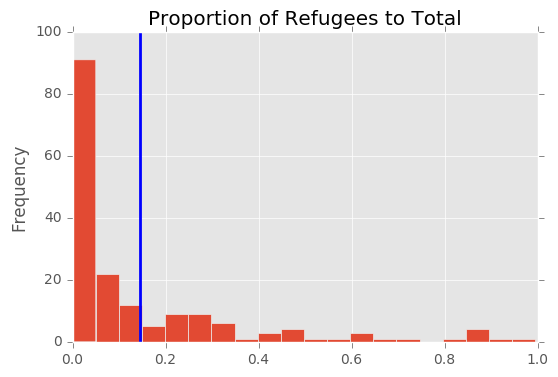

In [17]:
greencard['refugee_to_total'].plot.hist(bins = 20,title = 'Proportion of Refugees to Total',grid = True)
plt.axvline(greencard['refugee_to_total'].mean(),color ='b',linewidth = 2)
print greencard['refugee_to_total'].mean()
plt.show()

In the above histogram we see that most countries have almost no refugees coming into the United States due to the very heavy skew to the right with the blue line being the average putting it at 14.4%. THere are some that border on 100% total as well but it seems to only be one.

0.472584514312


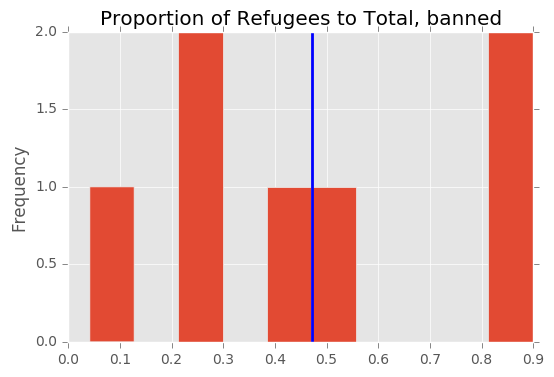

In [18]:
truesgreen['refugee_to_total'].plot.hist(bins = 10,title = 'Proportion of Refugees to Total, banned',grid = True)
plt.axvline(truesgreen['refugee_to_total'].mean(),color ='b',linewidth = 2)
print truesgreen['refugee_to_total'].mean()
plt.show()

We then looked at all the countries that were on the banned list and plotted their refugee proportions. This showed us that 2 of the countries were very high on the list in the 80%+ level but there was also one country that is less than 10% which is Yemen with only 4% of them being refugees. We see the average at 47.2% on this one as well which is significantly higher than the full set.

0.131143808384


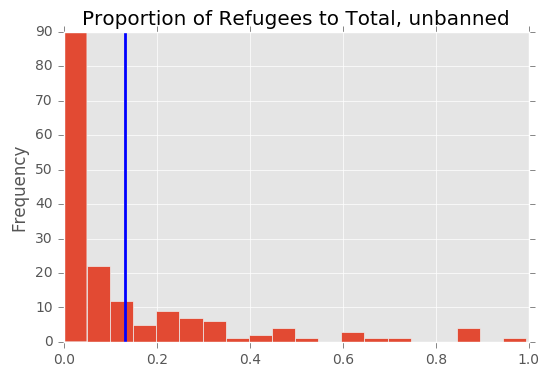

In [19]:
falsesgreen['refugee_to_total'].plot.hist(bins = 20,title = 'Proportion of Refugees to Total, unbanned',grid = True)
plt.axvline(falsesgreen['refugee_to_total'].mean(),color ='b',linewidth = 2)
print falsesgreen['refugee_to_total'].mean()
plt.show()

When looking at countries that are not banned we find that it does not look oo different but there are still a good number of values that are very high including the highest one. The overall proportion fell a small amount to 13.1%

In [116]:
greencard.sort('refugee_to_total',ascending=False).head(10)

C:\Users\Spencer\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Country of birth,Total,Family-sponsored preferences,Employment-based preferences,Immediate relatives of U.S. citizens,Diversity,Refugees and asylees,Other,refugee_to_total,banned
22,Bhutan,6325.0,NaN,4.0,28.0,NaN,6290.0,0.0,0.994466,False
87,Iraq,21107.0,209.0,68.0,866.0,37.0,18973.0,954.0,0.898896,True
31,Burma,12808.0,486.0,NaN,688.0,134.0,11443.0,NaN,0.893426,False
48,Cuba,54396.0,2211.0,9.0,3882.0,428.0,47803.0,63.0,0.878796,False
38,Central African Republic,234.0,NaN,6.0,19.0,NaN,205.0,0.0,0.876068,False
54,Djibouti,370.0,NaN,NaN,34.0,12.0,319.0,0.0,0.862162,False
164,Somalia,6796.0,116.0,NaN,986.0,56.0,5630.0,NaN,0.828428,True
39,Chad,175.0,NaN,NaN,29.0,10.0,129.0,1.0,0.737143,False
32,Burundi,351.0,9.0,8.0,60.0,40.0,234.0,0.0,0.666667,False
44,"Congo, Republic",496.0,20.0,3.0,87.0,68.0,313.0,5.0,0.631048,False


In this we get the ten countries with the highest refugee totals. From thsi we see that only 2 of the countries, Iraq and Somalia, are in this top 10 list. One that I found surprising, but thought it made sense, was Cuba being so high on the list! It makes sense that it is there but I was not initially expecting it.

In [10]:
greencard.groupby(by= 'banned').mean()
#many have 0 which skews the data, look at medians

,Total,Family-sponsored preferences,Employment-based preferences,Immediate relatives of U.S. citizens,Diversity,Refugees and asylees,Other,refugee_to_total
banned,,,,,,,,
False,5174.435233,1240.881657,824.901163,2408.587302,266.872727,708.295858,166.444444,0.131144
True,7480.714286,582.285714,374.200000,1384.285714,544.285714,4557.428571,195.200000,0.472585


In [11]:
greencard.groupby(by= 'banned').median()
#also hard to do since there are only 7 countries

,Total,Family-sponsored preferences,Employment-based preferences,Immediate relatives of U.S. citizens,Diversity,Refugees and asylees,Other,refugee_to_total
banned,,,,,,,,
False,875.0,103.0,87.5,511.0,41.0,47.0,7.0,0.041479
True,3840.0,209.0,68.0,986.0,136.0,1975.0,5.0,0.404632


In [40]:
greencard.groupby(by= 'banned').std()
#very high std dev

,Total,Family-sponsored preferences,Employment-based preferences,Immediate relatives of U.S. citizens,Diversity,Refugees and asylees,Other,refugee_to_total
banned,,,,,,,,
False,15144.772610,4485.837863,2980.651141,8147.619015,570.710577,3901.032560,1077.365276,0.203852
True,7190.767801,788.579676,627.434220,1058.903476,874.819165,6654.417552,424.214215,0.308354


All of the above are our summary statistics for each of the data values depending on if they are true or false to see what there is. From this we see that the standard deviations are very high and both the medians and the mean have a much higher 'refugee_to_total' values too.

In [92]:
ttest_ind(truesgreen['refugee_to_total'], falsesgreen['refugee_to_total'],nan_policy='omit')

Ttest_indResult(statistic=4.2491215437520609, pvalue=3.4914764184732473e-05)

Above we see a t-test between the trues and false's to find out if there is a significant difference between the two. First though, there is one major issue over the two having massive differences in sample sizes with the banned countries only having 7 vs the nonbanned countries having 193 data points. This comes with an issue of a high type II error rate. 
We do get a t stat of 4.249 with a p-value of .000054914 meaning that we reject the null that they are equal and conclude that they are not equal to each other and that there is a difference between the banned and unbanned nations refugee proportions.
Due to the crazy assumptions we decided to do a wilcox test in R with the code and resutlts below:
wilcox.test(refugee_to_total~banned,data=greencard)

	Wilcoxon rank sum test with continuity correction

data:  refugee_to_total by banned   
W = 167, p-value = 0.001299   
alternative hypothesis: true location shift is not equal to 0

This agrees with our above result that rejects the null and concludes that they do have not the same amount of refugees comng from these countries.

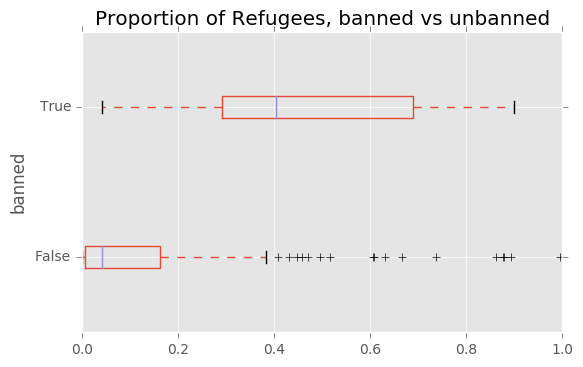

In [119]:
greencard.boxplot('refugee_to_total',by='banned',vert=False)
plt.title("Proportion of Refugees, banned vs unbanned")
plt.xlabel('')
plt.ylabel('banned')
plt.suptitle('')
plt.show()

In the above boxplot we see the banned vs unbanned issue at the forefront and the difference between the two with even the Q3 of the unbanned being lower than the Q1 of the banned countries. Though there are many outliers for the unbanend countries as is seen, still most values are much lower.

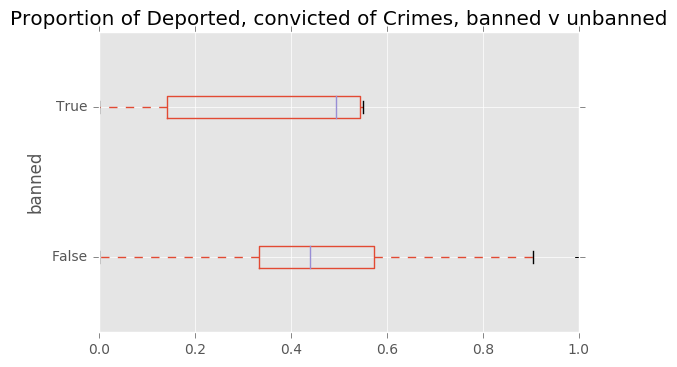

In [122]:
remove2015.boxplot('proportion_crim',by='banned',vert = False)
plt.title("Proportion of Deported, convicted of Crimes, banned v unbanned")
plt.xlabel('')
plt.ylabel('banned')
plt.suptitle('')
plt.show()

Above we see the banned vs unbanned for the proportion of people removed due to crimes in boxplot format. We see that they are fairly similar with the banned countries having lower Q1 and Q3 than unbanned nations and the unbanned nations having a much higher upper range too. This shows that they may be equal to one another in testing.

In [96]:
remove2015.groupby(by= 'banned').mean()

,Total,Criminal 1,Non-Criminal,proportion_crim
banned,,,,
False,2266.319728,1184.059322,1622.873950,0.464255
True,30.000000,6.833333,23.166667,0.353504


In [97]:
remove2015.groupby(by= 'banned').median()

,Total,Criminal 1,Non-Criminal,proportion_crim
banned,,,,
False,21.0,15.0,17.0,0.440627
True,16.5,6.5,7.5,0.493369


In [98]:
remove2015.groupby(by= 'banned').std()

,Total,Criminal 1,Non-Criminal,proportion_crim
banned,,,,
False,20274.860972,9848.737831,12728.540248,0.204729
True,36.758672,4.708149,37.402763,0.261774


Above is a collection of all the summary statistics for the 'remove2015' dataframe which shows similar std deviations and near equal median though banned countries has a lower mean of proportion criminal.

In [99]:
truesremove = remove2015[remove2015['banned']==True]
falsesremove = remove2015[remove2015['banned']==False]

ttest_ind(truesremove['proportion_crim'], falsesremove['proportion_crim'],nan_policy='omit')

Ttest_indResult(statistic=-1.2753301514009381, pvalue=0.20465587931689089)

Above is a t-test comparing the 'proportion_crim' from the True and False to each other. Again we face the issue of the nonbanned nations having 193 and the banned coutnries having 7. In this there is still the issue of a high Type 2 errors and we have a ton of assumptions to make but it concludes that the criminality proportions are the same in banned and non banend countries.  
Again though we perform the wilcox test in R in order to avoid these assumptions and get the following:

wilcox.test(proportion_crim~banned,data=remove2015)

	Wilcoxon rank sum test with continuity correction

data:  proportion_crim by banned    
W = 389, p-value = 0.6315    
alternative hypothesis: true location shift is not equal to 0    

This agrees with the T test in saying that there is no criminality difference in the banned countries vs the non banned countries.

Overall this gives a conclusion that while the banned countries are bringing in more refugees, they are not bringing in criminals per say at a larger rate than other countries. This discredits the "bad hombres" argument that President Trump seems to enjoy making when talking about the reasoning behind the travel ban.

## Now to map the proportions that are refugees on a map

In [34]:
fig, ax = plt.subplots(figsize=(15,30))

In [35]:
m = Basemap(resolution='h', # c, l, i, h, f or None
            projection='merc',
            lat_0=25.5, lon_0=10.8,
            llcrnrlon=-180.7, llcrnrlat= -56.7, urcrnrlon=180, urcrnrlat=78)

In [36]:
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('Shapefile/ne_110m_admin_0_countries','country')

In [14]:
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.country],
        'country': [info['brk_name'] for info in m.country_info]
        })

df_poly = df_poly.merge(greencard, on='country', how='left')

In [15]:
df_poly

,country,shapes,Total,Family-sponsored preferences,Employment-based preferences,Immediate relatives of U.S. citizens,Diversity,Refugees and asylees,Other,refugee_to_total,banned
0,Afghanistan,"Poly((2.68992e+07, 1.19382e+07) ...)",8328.0,272.0,16.0,1011.0,50.0,691.0,6288.0,0.082973,False
1,Angola,"Poly((2.19083e+07, 7.03573e+06) ...)",154.0,8.0,12.0,89.0,6.0,39.0,0.0,0.253247,False
2,Angola,"Poly((2.14758e+07, 7.05732e+06) ...)",154.0,8.0,12.0,89.0,6.0,39.0,0.0,0.253247,False
3,Albania,"Poly((2.23824e+07, 1.2824e+07) ...)",4653.0,614.0,81.0,2017.0,1770.0,152.0,19.0,0.032667,False
4,United Arab Emirates,"Poly((2.58283e+07, 1.04707e+07) ...)",1193.0,209.0,312.0,303.0,118.0,238.0,13.0,0.199497,False
5,Argentina,"Poly((1.28096e+07, 297934) ...)",3730.0,194.0,1095.0,2194.0,48.0,133.0,66.0,0.035657,False
6,Argentina,"Poly((1.28692e+07, 5.17261e+06) ...)",3730.0,194.0,1095.0,2194.0,48.0,133.0,66.0,0.035657,False
7,Armenia,"Poly((2.49391e+07, 1.27107e+07) ...)",2962.0,247.0,120.0,1035.0,1324.0,225.0,11.0,0.075962,False
8,Antarctica,"Poly((1.34688e+07, -7.85667e+06) ...)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antarctica,"Poly((2.38978e+06, -7.51659e+06) ...)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:

m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()

m.readshapefile('Shapefile/ne_110m_admin_0_countries','country')
cmap = plt.get_cmap('PuBuGn')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()
 
pc.set_facecolor(cmap(norm(df_poly['refugee_to_total'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
 
mapper.set_array(df_poly['refugee_to_total'])
plt.colorbar(mapper, shrink=0.3)

m.readshapefile('Shapefile/ne_110m_admin_0_countries','country')
plt.title("Proportion of Green Card Recipiants who are Refugees")

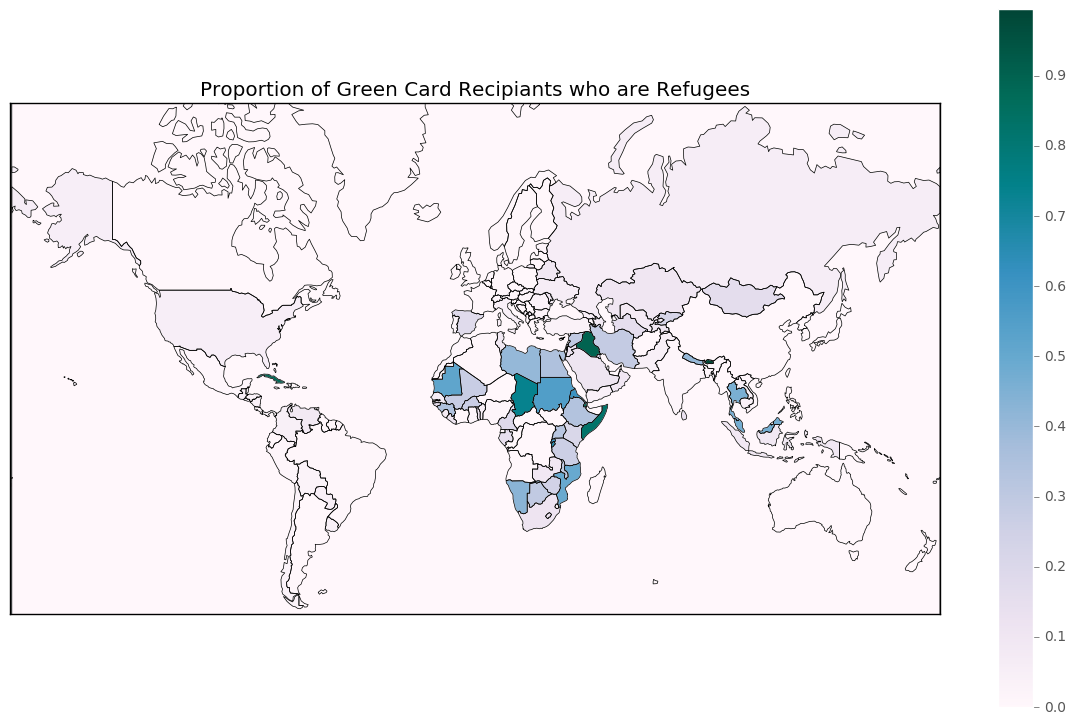

In [17]:
plt.show()

From the map we see that the countries with the highest refugee proportions primarily are in Africa and the middle east and some South East Asian nations. We used Basemap to draw this and figure out what regions had the most 

In [23]:
fig, ax = plt.subplots(figsize=(15,30))

In [24]:
m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lat_0=25.5, lon_0=10.8,
            llcrnrlon=-180.7, llcrnrlat= -56.7, urcrnrlon=180, urcrnrlat=78)

In [25]:
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('Shapefile/ne_110m_admin_0_countries','country')

(177,
 5,
 [-179.99999999999997, -90.00000000000003, 0.0, 0.0],
 [180.00000000000014, 83.64513000000001, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x33b93080>)

In [22]:
df_crime = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.country],
        'country': [info['brk_name'] for info in m.country_info]
        })

df_crime = df_crime.merge(remove2015, on='country', how='left')
df_crime

,country,shapes,Total,Criminal 1,Non-Criminal,proportion_crim,banned
0,Afghanistan,"Poly((2.68992e+07, 1.19382e+07) ...)",9.0,NaN,NaN,NaN,False
1,Angola,"Poly((2.19083e+07, 7.03573e+06) ...)",10.0,3.0,7.0,0.300000,False
2,Angola,"Poly((2.14758e+07, 7.05732e+06) ...)",10.0,3.0,7.0,0.300000,False
3,Albania,"Poly((2.23824e+07, 1.2824e+07) ...)",40.0,21.0,19.0,0.525000,False
4,United Arab Emirates,"Poly((2.58283e+07, 1.04707e+07) ...)",NaN,0.0,NaN,NaN,False
5,Argentina,"Poly((1.28096e+07, 297934) ...)",132.0,58.0,74.0,0.439394,False
6,Argentina,"Poly((1.28692e+07, 5.17261e+06) ...)",132.0,58.0,74.0,0.439394,False
7,Armenia,"Poly((2.49391e+07, 1.27107e+07) ...)",16.0,NaN,NaN,NaN,False
8,Antarctica,"Poly((1.34688e+07, -7.85667e+06) ...)",NaN,NaN,NaN,NaN,NaN
9,Antarctica,"Poly((2.38978e+06, -7.51659e+06) ...)",NaN,NaN,NaN,NaN,NaN


In [27]:
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()

m.readshapefile('Shapefile/ne_110m_admin_0_countries','country')
cmap = plt.get_cmap('PuBuGn')   
pc = PatchCollection(df_crime.shapes, zorder=2)
norm = Normalize()
 
pc.set_facecolor(cmap(norm(df_crime['proportion_crim'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
 
mapper.set_array(df_crime['proportion_crim'])
plt.colorbar(mapper, shrink=0.3)

m.readshapefile('Shapefile/ne_110m_admin_0_countries','country')
plt.title("Proportion of People who are Criminals and removed")

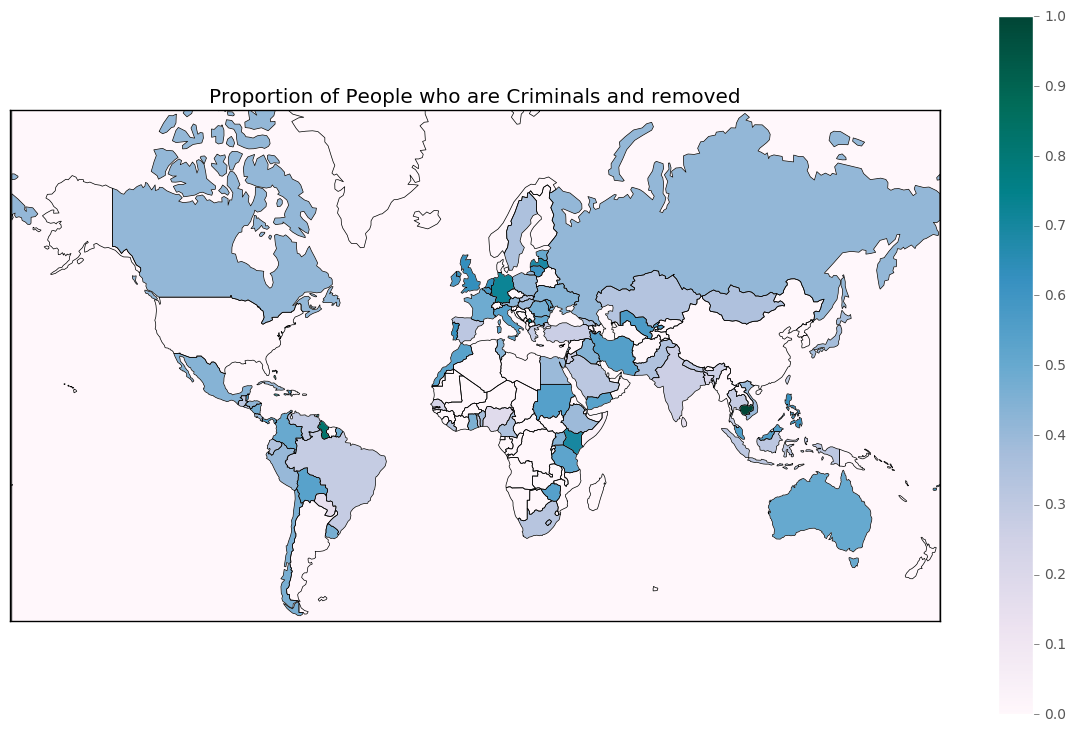

In [28]:
plt.show()

In this map we are looking at the proportion of individuals who were removed who were convicted criminals. This shows that the countries that were major places where criminals were removed were not really the countries that were banned or had large proportions of refugees coming from!